In [106]:
import pandas as pd
from src.config import get_interim_dir

all_data = {}
for t in ["T1", "T2", "T3"]:
    all_data[t] = pd.read_pickle(get_interim_dir() + "pca_analysis_{}.pkl".format(t))

In [ ]:
# for t in ["T1", "T2", "T3"]:
#     all_data in ["T1", "T2", "T3"]

In [107]:
all_data[t]["outliers"]

mahal_dist         p    nn_dist  \
Alias Gene          Barcode                                            
MB05  0610009B22Rik 0610009B22Rik-1   30.351568  1.000000   4.761217   
                    0610009B22Rik-2   49.857333  0.999999   5.804354   
                    0610009B22Rik-3   39.146058  1.000000   5.358543   
                    0610009B22Rik-4   28.381124  1.000000   4.594384   
                    0610009B22Rik-5   38.728623  1.000000   5.177756   
...                                         ...       ...        ...   
MB06  mei-04        Mei4-1            56.070962  0.999967   6.149516   
                    Mei4-2            62.716392  0.999543   6.484826   
                    Mei4-3            32.437160  1.000000   4.921122   
                    Mei4-4           416.318835  0.000000  13.220681   
                    Mei4-5            76.341576  0.980910   6.896679   

                                     rejected  p_corrected  
Alias Gene          Barcode                                 
MB05  0610009B22Rik 0610009B22Rik-1     False          1.0  
                    0610009B22Rik-2     False          1.0  
                    0610009B22Rik-3     False          1.0  
                    0610009B22Rik-4     False          1.0  
                    0610009B22Rik-5     False          1.0  
...                                       ...          ...  
MB06  mei-04        Mei4-1              False          1.0  
                    Mei4-2              False          1.0  
                    Mei4-3              False          1.0  
                    Mei4-4               True          0.0  
                    Mei4-5              False          1.0  

[174221 rows x 5 columns]

In [108]:
all_data[t]["outliers"]["rejected"].sum()

22648

In [109]:
all_guides = {}
for t in ["T1", "T2", "T3"]:
    all_guides[t] = all_data[t]["outliers"].reset_index()
    all_guides[t]["Target"] = t
    all_guides[t] = all_guides[t].set_index(["Target", "Alias", "Gene"])
all_guides = pd.concat(all_guides.values())

In [110]:
outlier_genes = all_guides[all_guides["rejected"]]
outlier_genes = outlier_genes.groupby("Gene").size().sort_values()
sizes = all_guides.groupby("Gene").size().sort_values()
num_targets = all_guides[all_guides["rejected"]].groupby(["Gene", "Target"]).size().groupby("Gene").size().to_frame("num_targets")
outlier_genes = outlier_genes.to_frame(name="num_outliers").join(sizes.to_frame(name="num_guides"), how='inner')
outlier_genes = outlier_genes.join(num_targets)
outlier_genes["fraction"] = outlier_genes["num_outliers"]/outlier_genes["num_guides"]
outlier_genes

,num_outliers,num_guides,num_targets,fraction
Gene,,,,
Ifi205,1,24,1,0.041667
Lyz1,1,24,1,0.041667
Nts,1,30,1,0.033333
Dcxr,1,30,1,0.033333
Prtg,1,30,1,0.033333
...,...,...,...,...
Polq,24,29,3,0.827586
Arpc4,24,50,3,0.480000
Orc4,24,32,3,0.750000


In [186]:
outlier_genes[(outlier_genes["num_targets"] > 1)].shape

(10787, 4)

<AxesSubplot:xlabel='fraction', ylabel='Count'>

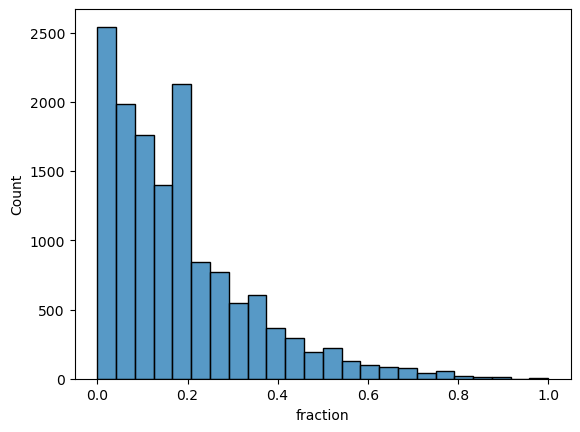

In [111]:
import seaborn as sns

sns.histplot(outlier_genes["fraction"], bins=24, binrange=(0,1))


/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_outliers', ylabel='count'>

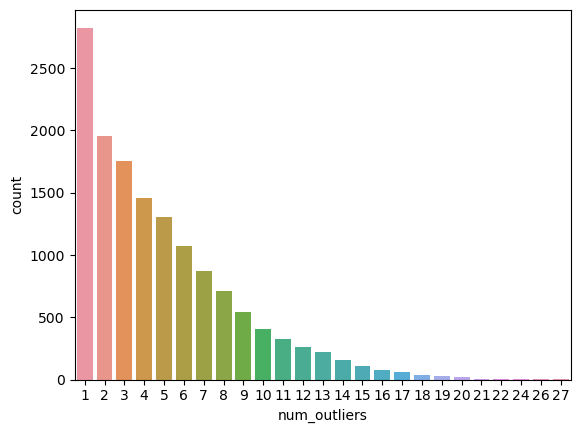

In [112]:
sns.countplot(outlier_genes["num_outliers"])

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_targets', ylabel='count'>

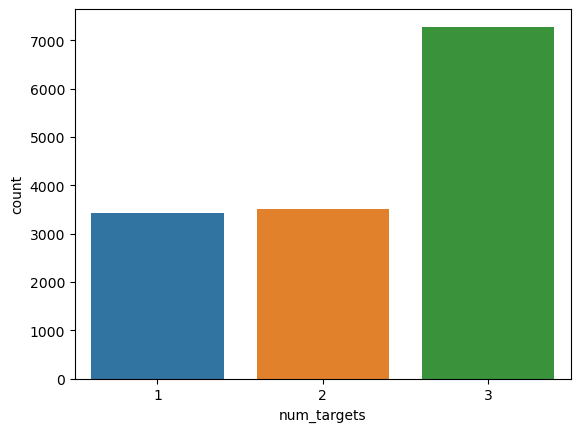

In [113]:
sns.countplot(outlier_genes["num_targets"])

In [114]:
outlier_genes[outlier_genes.num_targets > 1]

,num_outliers,num_guides,num_targets,fraction
Gene,,,,
Msn,2,30,2,0.066667
Nckap1l,2,30,2,0.066667
Myh1,2,30,2,0.066667
Dtnb,2,30,2,0.066667
Tmem184a,2,30,2,0.066667
...,...,...,...,...
Polq,24,29,3,0.827586
Arpc4,24,50,3,0.480000
Orc4,24,32,3,0.750000


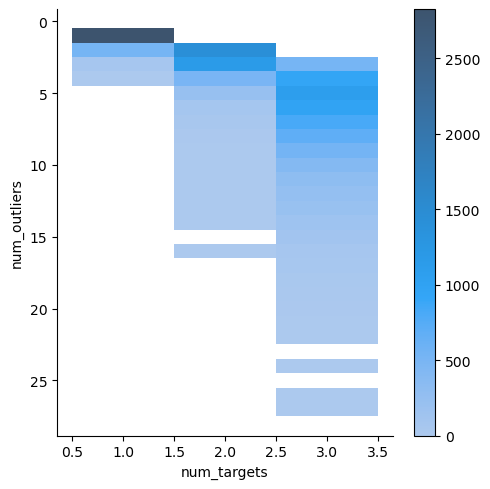

In [115]:
sns.displot(outlier_genes[["num_outliers", "num_targets"]].astype('category'), y="num_outliers", x="num_targets", cbar=True)

In [116]:
all_guides.head()

Barcode  mahal_dist    p   nn_dist  \
Target Alias Gene                                                        
T1     MB01  0610009B22Rik  0610009B22Rik-1   37.534185  1.0  5.207446   
             0610009B22Rik  0610009B22Rik-2   33.883566  1.0  5.013190   
             0610009B22Rik  0610009B22Rik-3   30.903652  1.0  4.993708   
             0610009B22Rik  0610009B22Rik-4   25.622151  1.0  4.488181   
             0610009B22Rik  0610009B22Rik-5   41.727038  1.0  5.295114   

                            rejected  p_corrected  
Target Alias Gene                                  
T1     MB01  0610009B22Rik     False          1.0  
             0610009B22Rik     False          1.0  
             0610009B22Rik     False          1.0  
             0610009B22Rik     False          1.0  
             0610009B22Rik     False          1.0

In [117]:
all_guides.index.unique(level="Gene").to_series().sample(10)

Gene
Ppp1r15b    Ppp1r15b
Mrps31        Mrps31
Etfa            Etfa
Cnot10        Cnot10
Pcdh15        Pcdh15
Fes              Fes
Mrpl36        Mrpl36
Pak2            Pak2
Kctd8          Kctd8
Bloc1s1      Bloc1s1
Name: Gene, dtype: object

In [119]:
idx = pd.IndexSlice
all_guides.loc[idx[:,:,"Ceacam14"],]

Barcode  mahal_dist         p   nn_dist  rejected  \
Target Alias Gene                                                             
T1     MB01  Ceacam14  Ceacam14-1   47.631892  1.000000  5.659856     False   
             Ceacam14  Ceacam14-2   78.626162  0.969932  7.016566     False   
             Ceacam14  Ceacam14-3  118.895036  0.150814  7.488998     False   
             Ceacam14  Ceacam14-4  142.603230  0.007189  8.835810     False   
             Ceacam14  Ceacam14-5   59.173734  0.999878  6.303983     False   
       MB02  Ceacam14  Ceacam14-1   32.983947  1.000000  5.117099     False   
             Ceacam14  Ceacam14-2   63.338587  0.999434  6.438929     False   
             Ceacam14  Ceacam14-3   67.156810  0.998086  6.578160     False   
             Ceacam14  Ceacam14-4   67.236022  0.998040  6.448588     False   
             Ceacam14  Ceacam14-5   79.679979  0.963434  6.769318     False   
T2     MB03  Ceacam14  Ceacam14-1   51.392189  0.999997  5.573802     False   
             Ceacam14  Ceacam14-2   82.009114  0.945282  6.981585     False   
             Ceacam14  Ceacam14-3   33.149982  1.000000  4.826957     False   
             Ceacam14  Ceacam14-4   57.965486  0.999926  5.932442     False   
             Ceacam14  Ceacam14-5   63.235920  0.999453  6.474067     False   
       MB04  Ceacam14  Ceacam14-1   40.066856  1.000000  5.333712     False   
             Ceacam14  Ceacam14-2  104.446478  0.469255  7.660217     False   
             Ceacam14  Ceacam14-3   50.114511  0.999998  5.821838     False   
             Ceacam14  Ceacam14-4  138.584333  0.013234  7.948211     False   
             Ceacam14  Ceacam14-5   31.545076  1.000000  4.939232     False   
T3     MB05  Ceacam14  Ceacam14-1   32.718989  1.000000  4.775905     False   
             Ceacam14  Ceacam14-2   90.225901  0.829968  7.391819     False   
             Ceacam14  Ceacam14-3   86.398385  0.894366  7.569780     False   
             Ceacam14  Ceacam14-4  116.359672  0.191871  7.928062     False   
             Ceacam14  Ceacam14-5   40.632676  1.000000  5.367171     False   
       MB06  Ceacam14  Ceacam14-1   38.299659  1.000000  5.308774     False   
             Ceacam14  Ceacam14-2   75.296056  0.984715  7.052220     False   
             Ceacam14  Ceacam14-3  116.170484  0.195213  7.996263     False   
             Ceacam14  Ceacam14-4  121.271738  0.118467  8.632875     False   
             Ceacam14  Ceacam14-5   53.702645  0.999989  6.163396     False   

                       p_corrected  
Target Alias Gene                   
T1     MB01  Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     0.838946  
             Ceacam14     0.053445  
             Ceacam14     1.000000  
       MB02  Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
T2     MB03  Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
       MB04  Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     0.092450  
             Ceacam14     1.000000  
T3     MB05  Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
       MB06  Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     1.000000  
             Ceacam14     0.699404  
             Ceacam14     1.000000

/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mahal_dist', ylabel='Density'>

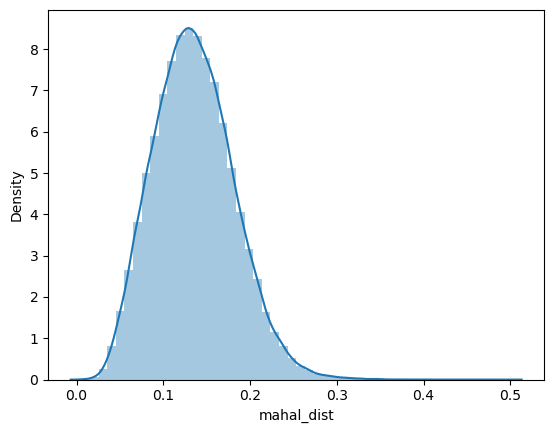

In [120]:
import numpy as np

sns.distplot(np.power(all_guides.loc["T1", "mahal_dist"], -1/2), )

In [121]:
from src.config import get_common_barcodes

filtered_barcodes = pd.read_csv(get_common_barcodes(), sep="\t")
filtered_barcodes.head()

,Target,Alias,Gene,Barcode,Filtered,Counts,Corr_Within,Corr_Between,log10Count
0,T1,MB01,0610009B22Rik,0610009B22Rik-1,0,2247.0,0.952007,0.910326,3.351603
1,T1,MB01,0610009B22Rik,0610009B22Rik-2,0,2792.0,0.962390,0.939419,3.445915
2,T1,MB01,0610009B22Rik,0610009B22Rik-3,0,3907.0,0.966884,0.952470,3.591843
3,T1,MB01,0610009B22Rik,0610009B22Rik-4,0,3757.0,0.968739,0.955281,3.574841
4,T1,MB01,0610009B22Rik,0610009B22Rik-5,0,2549.0,0.965979,0.959352,3.406370


In [122]:
gRNA_counts = filtered_barcodes.groupby(["Target", "Alias", "Gene"]).size()
gRNA_counts = gRNA_counts.to_frame(name="num_guides").join(filtered_barcodes[filtered_barcodes.Filtered.isin([1,2,3,4])].groupby(["Target", "Alias", "Gene"]).size().to_frame(name="num_bad_guides")).fillna(0)
gRNA_counts = gRNA_counts.join(filtered_barcodes[filtered_barcodes.Filtered == 5].groupby(["Target", "Alias", "Gene"]).size().to_frame(name="num_guides_guilty_by_assoc")).fillna(0)
gRNA_counts["num_filtered"] = gRNA_counts["num_bad_guides"] + gRNA_counts["num_guides_guilty_by_assoc"]
gRNA_counts[(gRNA_counts["num_filtered"] == gRNA_counts["num_guides"]) & (gRNA_counts["num_guides_guilty_by_assoc"] > 0)]

num_guides  num_bad_guides  num_guides_guilty_by_assoc  \
Target Alias Gene                                                              
T2     MB03  Cyp2c68           2             0.0                         2.0   
             Cyp3a11           2             0.0                         2.0   
             Klra10            2             1.0                         1.0   
             Lsm7              2             0.0                         2.0   
             Rpl24             3             1.0                         2.0   
             Ube2d3            3             1.0                         2.0   
       MB04  Cyp2c68           2             0.0                         2.0   
             Cyp3a11           2             0.0                         2.0   
             Gm7361            2             0.0                         2.0   
             Klra10            2             1.0                         1.0   
             Lsm7              2             0.0                         2.0   
             Rpl3              2             0.0                         2.0   
T3     MB05  Cct5              4             2.0                         2.0   
             Gm14295           2             0.0                         2.0   
       MB06  Cct5              4             2.0                         2.0   
             Gm14295           2             0.0                         2.0   
             H2bc11            2             0.0                         2.0   
             Rpl18             2             0.0                         2.0   
             Tomm20            3             1.0                         2.0   

                      num_filtered  
Target Alias Gene                   
T2     MB03  Cyp2c68           2.0  
             Cyp3a11           2.0  
             Klra10            2.0  
             Lsm7              2.0  
             Rpl24             3.0  
             Ube2d3            3.0  
       MB04  Cyp2c68           2.0  
             Cyp3a11           2.0  
             Gm7361            2.0  
             Klra10            2.0  
             Lsm7              2.0  
             Rpl3              2.0  
T3     MB05  Cct5              4.0  
             Gm14295           2.0  
       MB06  Cct5              4.0  
             Gm14295           2.0  
             H2bc11            2.0  
             Rpl18             2.0  
             Tomm20            3.0

In [123]:
filtered_barcodes[filtered_barcodes.Gene == "Faap100"]

,Target,Alias,Gene,Barcode,Filtered,Counts,Corr_Within,Corr_Between,log10Count
25691,T1,MB01,Faap100,Faap100-1,0,573.0,0.790976,0.791249,2.758155
25692,T1,MB01,Faap100,Faap100-2,0,1299.0,0.873051,0.876250,3.113609
25693,T1,MB01,Faap100,Faap100-3,0,518.0,0.804341,0.845150,2.714330
25694,T1,MB01,Faap100,Faap100-4,0,6418.0,0.803354,0.824527,3.807400
25695,T1,MB01,Faap100,Faap100-5,0,441.0,0.810590,0.782886,2.644439
115107,T1,MB02,Faap100,Faap100-1,0,641.0,0.843635,0.793234,2.806858
115108,T1,MB02,Faap100,Faap100-2,0,1268.0,0.869882,0.847052,3.103119
115109,T1,MB02,Faap100,Faap100-3,0,636.0,0.865406,0.866472,2.803457
115110,T1,MB02,Faap100,Faap100-4,0,6810.0,0.752075,0.782886,3.833147
115111,T1,MB02,Faap100,Faap100-5,0,728.0,0.845240,0.799024,2.862131


In [124]:
from src.config import HOME_PATH
from src.config import get_hussmann_supplementary_xlsx


genesubset2 = pd.read_csv(HOME_PATH + "/repos/MUSICian/src/data/GeneSubset2.txt", sep="\t")["Gene"]
genesubsetSD30 = pd.read_csv(HOME_PATH + "/repos/MUSICian/src/data/GeneSubsetSD30.txt", sep="\t")["Gene"]
hussmann_repair_genes = pd.read_excel(get_hussmann_supplementary_xlsx(4), sheet_name="Table S4", skiprows=1)["Gene"].str.lower()


In [125]:
genesubset2

0          Dut
1      Faap100
2        Fanca
3        Fancb
4        Fancc
5       Fancd2
6        Fancg
7        Fanci
8        Fancm
9        H2afx
10        Helq
11       Rad51
12    Rad51ap1
13       Rad54
14      Rnf168
15        Rnf8
16       Rbbp8
17       Ube2t
18        Poll
19        Polm
20        Polq
21        Lig4
22       Xrcc4
23       Xrcc5
24       Xrcc6
25       H2afx
26      Mre11a
27       Rad50
28         Nbn
29    Trp53bp1
30        Rif1
31      Paxip1
32       Prkdc
33      Mad2l2
34        Ctc1
35        Stn1
36        Ten1
37       Shld2
38       Brca1
39       Brca2
40       Bard1
41       Rad52
42       Trp53
43        Dbr1
44      Mettl3
45     Mettl14
46       Fancl
47        Hus1
48       Rad17
49       Tonsl
50       Wdr48
51        Usp1
Name: Gene, dtype: object

In [185]:
print(genesubset2.shape)
print(genesubset2.isin(outlier_genes[outlier_genes["num_targets"] > 1].index.to_list()).sum())
missing_genes = genesubset2[~genesubset2.isin(outlier_genes[outlier_genes["num_targets"] > 1].index.to_list())]
missing_genes

(52,)
40


2        Fanca
9        H2afx
13       Rad54
15        Rnf8
18        Poll
25       H2afx
29    Trp53bp1
31      Paxip1
35        Stn1
42       Trp53
44      Mettl3
45     Mettl14
Name: Gene, dtype: object

In [102]:
missing_genes.isin(all_data["T1"]["outliers"]["nn_dist"].sort_values()[-3000:].index.to_series())

2     False
9     False
10    False
13    False
18    False
25    False
29    False
32    False
34    False
35    False
36    False
37    False
41    False
42    False
44    False
45    False
50    False
Name: Gene, dtype: bool

In [50]:
print(genesubsetSD30.shape)
genesubsetSD30.isin(outlier_genes[outlier_genes["num_targets"] > 0].index.to_list()).sum()

(628,)


514

In [51]:
print(hussmann_repair_genes.shape)
hussmann_repair_genes.isin(outlier_genes[outlier_genes["num_targets"] > 0].index.str.lower().to_list()).sum()

(476,)


183

In [163]:
X = {}
for t in ["T1", "T2", "T3"]:
    X[t] = all_data[t]["X"].reset_index()
    X[t]["Target"] = t
    X[t] = X[t].set_index(["Target", "Alias", "Gene"])
X = pd.concat(X.values())

X.shape

(519536, 106)

In [155]:
examples = X.xs("MB06", level="Alias").index.to_series().sample(5)
ax = pd.concat((X.xs("MB06", level="Alias").loc[examples].sample(5), X.xs("MB06", level="Alias").xs("Mettl14", level="Gene")), axis=0).fillna(0).set_index("Barcode")
examples

Target  Gene  
T3      Sgcg        (T3, Sgcg)
        Fzd1        (T3, Fzd1)
        Sim1        (T3, Sim1)
        Akna        (T3, Akna)
        Dynlt5    (T3, Dynlt5)
dtype: object

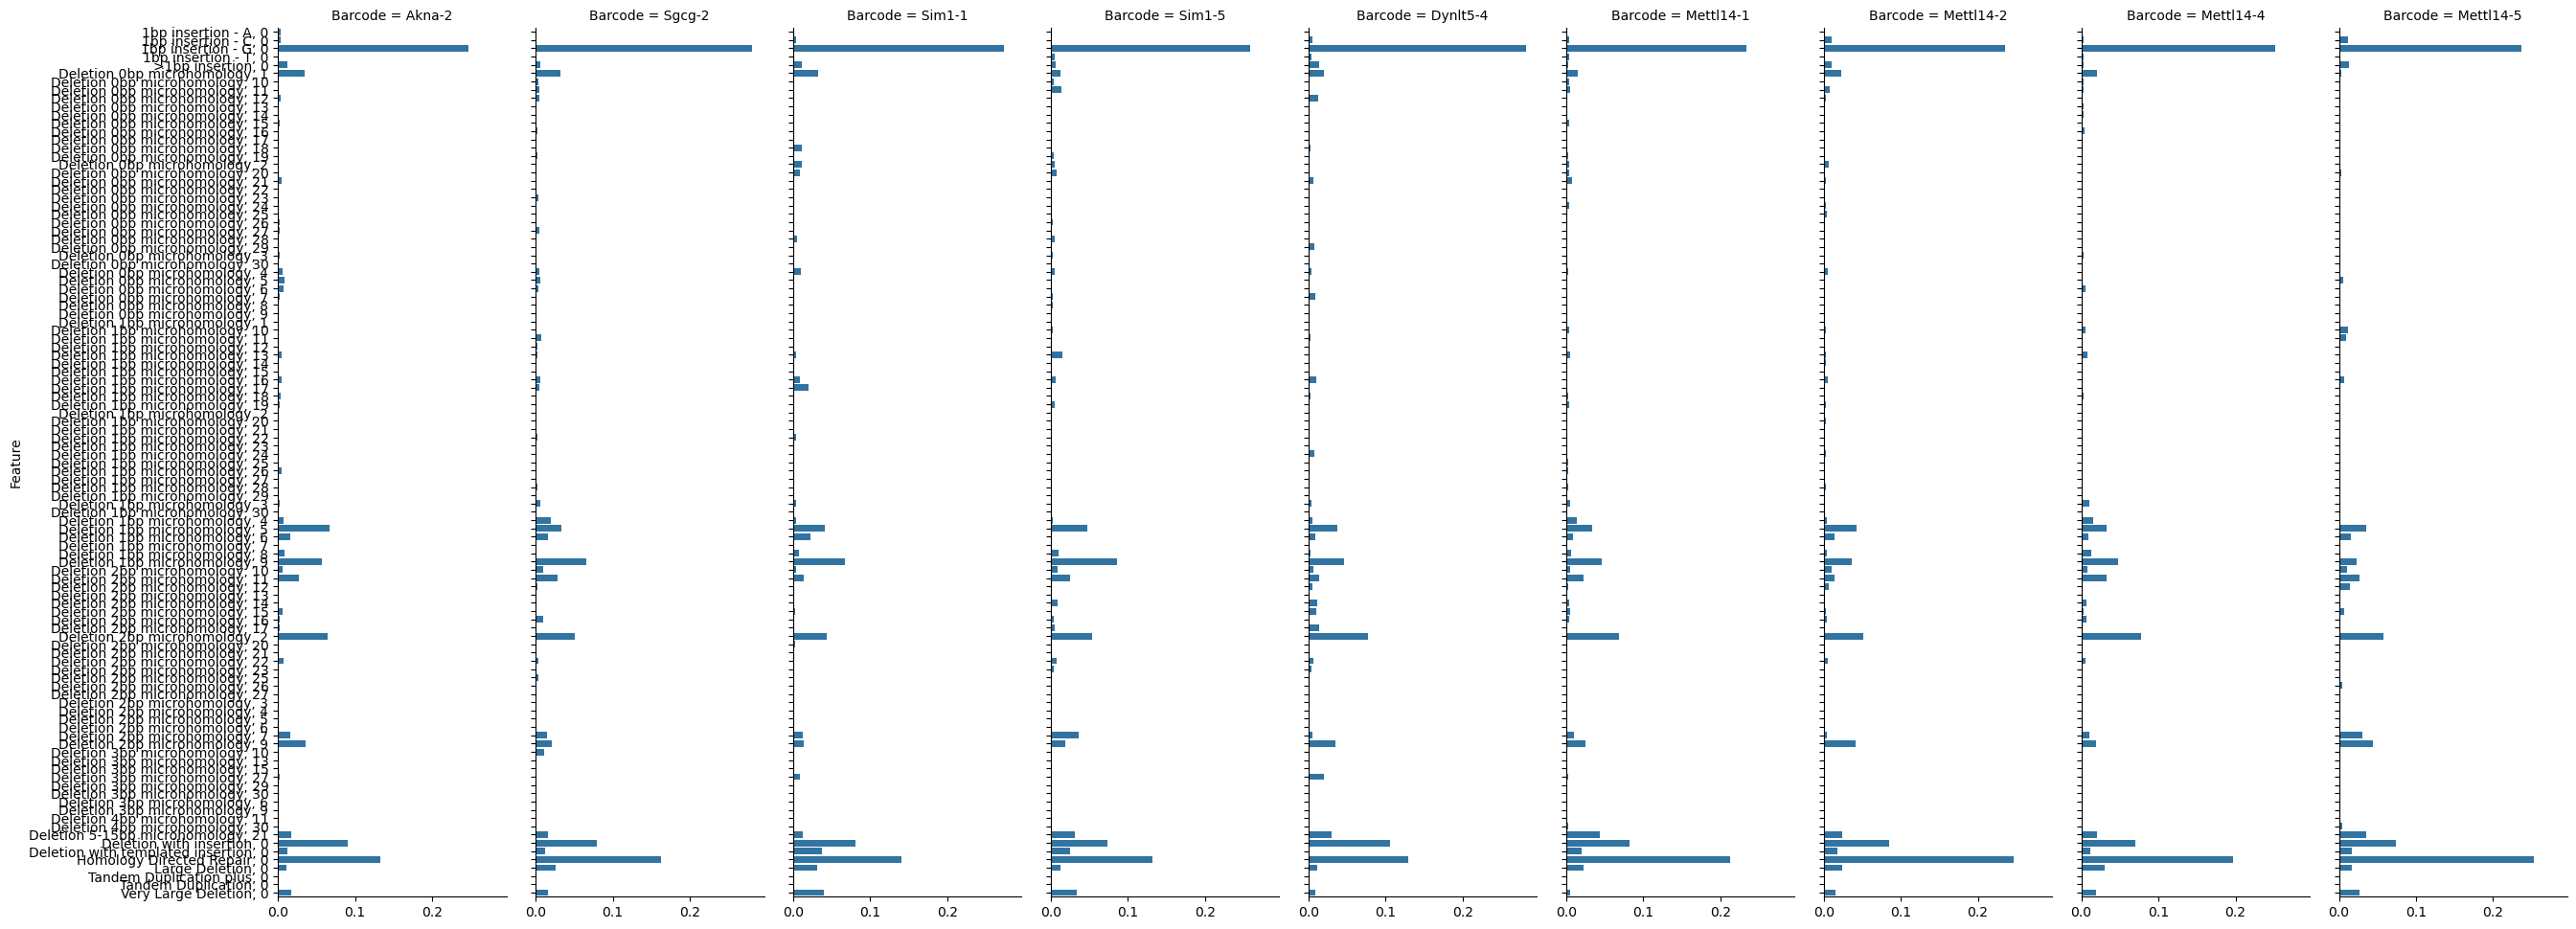

In [161]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(data=ax.reset_index().melt(id_vars="Barcode"), col="Barcode", height=10, aspect=.3)
g.map_dataframe(sns.barplot, y="Feature", x="value")
g.set(xlabel=None)

In [412]:
ax.T.corr()

,"(T3, 1700022I11Rik, 1700022I11Rik-4)","(T3, Pecr, Pecr-3)","(T3, Marchf3, Marchf3-1)","(T3, Zfp131, Zfp131-3)","(T3, Dhx30, Dhx30-3)","(T3, Mettl14-1)","(T3, Mettl14-2)","(T3, Mettl14-4)","(T3, Mettl14-5)"
"(T3, 1700022I11Rik, 1700022I11Rik-4)",1.000000,0.927735,0.968539,0.977498,0.965995,0.930358,0.905295,0.946471,0.886664
"(T3, Pecr, Pecr-3)",0.927735,1.000000,0.929670,0.960181,0.917553,0.911523,0.874795,0.922268,0.865556
"(T3, Marchf3, Marchf3-1)",0.968539,0.929670,1.000000,0.974890,0.957333,0.980295,0.963805,0.988996,0.952277
"(T3, Zfp131, Zfp131-3)",0.977498,0.960181,0.974890,1.000000,0.978786,0.950797,0.924954,0.963045,0.915710
"(T3, Dhx30, Dhx30-3)",0.965995,0.917553,0.957333,0.978786,1.000000,0.916224,0.893345,0.942438,0.880501
"(T3, Mettl14-1)",0.930358,0.911523,0.980295,0.950797,0.916224,1.000000,0.988901,0.990155,0.981740
"(T3, Mettl14-2)",0.905295,0.874795,0.963805,0.924954,0.893345,0.988901,1.000000,0.978179,0.989461
"(T3, Mettl14-4)",0.946471,0.922268,0.988996,0.963045,0.942438,0.990155,0.978179,1.000000,0.970547
"(T3, Mettl14-5)",0.886664,0.865556,0.952277,0.915710,0.880501,0.981740,0.989461,0.970547,1.000000


Ttest_indResult(statistic=-2.903490988332832, pvalue=0.0036912026768347486)

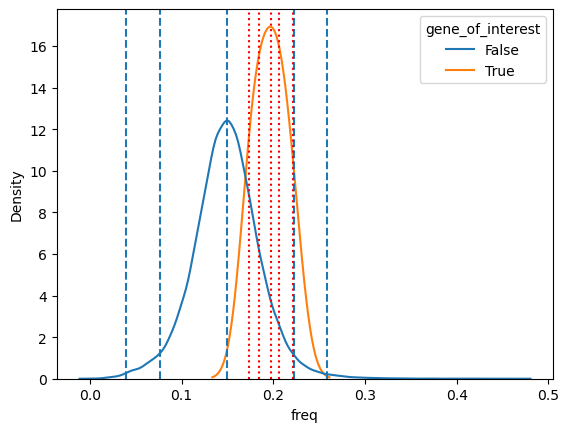

In [178]:
gene_of_interest = "Trp53"
sample_hdr_events = X.xs("MB06", level="Alias")["Homology Directed Repair, 0"].to_frame("freq")
sample_hdr_events["gene_of_interest"] = sample_hdr_events.index.get_level_values("Gene") == gene_of_interest

sns.kdeplot(data = sample_hdr_events.reset_index(drop=True), x="freq", hue="gene_of_interest", common_norm=False)


plt.axvline(sample_hdr_events["freq"].mean(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() + 2* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() + 3* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() - 2* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() - 3* sample_hdr_events["freq"].std(), ls="--")

for v in sample_hdr_events.loc[sample_hdr_events.gene_of_interest, "freq"].values:
    plt.axvline(v, color="r", ls=":")

from scipy.stats import ttest_ind

ttest_ind(sample_hdr_events.loc[~sample_hdr_events.gene_of_interest, "freq"].values, sample_hdr_events.loc[sample_hdr_events.gene_of_interest, "freq"].values)

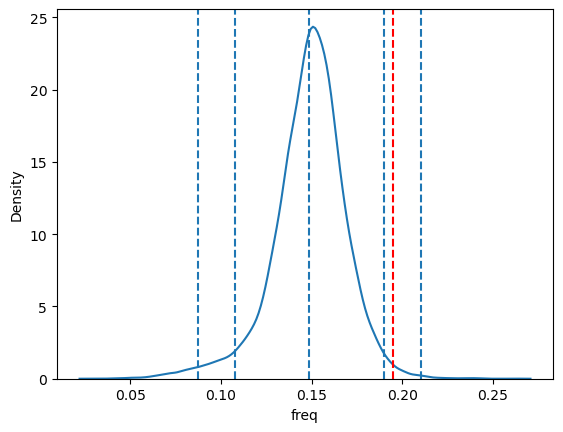

In [179]:
gene_of_interest = "Trp53bp1"
sample_hdr_events = X.xs("MB06", level="Alias")["Homology Directed Repair, 0"].groupby(["Gene"]).mean().to_frame("freq")
sample_hdr_events["gene_of_interest"] = sample_hdr_events.index.get_level_values("Gene") == gene_of_interest

sns.kdeplot(data = sample_hdr_events, x="freq", common_norm=False)


plt.axvline(sample_hdr_events["freq"].mean(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() + 2* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() + 3* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() - 2* sample_hdr_events["freq"].std(), ls="--")
plt.axvline(sample_hdr_events["freq"].mean() - 3* sample_hdr_events["freq"].std(), ls="--")

plt.axvline(sample_hdr_events.loc[gene_of_interest, "freq"], color="r", ls="--")

# from scipy.stats import ttest_ind

# ttest_ind(sample_hdr_events.loc[~sample_hdr_events.gene_of_interest, "freq"].values, sample_hdr_events.loc[sample_hdr_events.gene_of_interest, "freq"].values)